# TASK 1 : TABULAR Q LEARNING UPDATE


In [3]:
import numpy as np

def init_q_table(n_states, n_actions):
    return np.zeros((n_states, n_actions))

q_table = init_q_table(5, 3)
print(q_table)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [4]:
import numpy as np

def q_update(Q, s, a, r, s_next, alpha, gamma):
    Q[s, a] = Q[s, a] + alpha * (r + gamma * np.max(Q[s_next]) - Q[s, a])
    return Q
Q = np.zeros((5, 3))
Q = q_update(Q, s=0, a=1, r=10, s_next=2, alpha=0.1, gamma=0.9)
print(Q)

[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [6]:
import numpy as np

GRID_SIZE = 4
terminal_states = [(0, 0), (3, 3)]

def get_reward(state):
    if state in terminal_states:
        return 0
    return -1

actions = {
    0: (-1, 0),
    1: (1, 0),
    2: (0, -1),
    3: (0, 1)
}

def next_state(state, action):
    row, col = state
    dr, dc = actions[action]
    new_row = max(0, min(GRID_SIZE - 1, row + dr))
    new_col = max(0, min(GRID_SIZE - 1, col + dc))
    return (new_row, new_col)

def state_to_index(state):
    return state[0] * GRID_SIZE + state[1]

def index_to_state(index):
    return (index // GRID_SIZE, index % GRID_SIZE)

state = (1, 1)
action = 0
new_state = next_state(state, action)
reward = get_reward(new_state)
print("Moved from", state, "to", new_state, "with reward", reward)


Moved from (1, 1) to (0, 1) with reward -1


# TASK 2 : EPSILON GREEDY POLICY ON A CUSTOM GRID WORLD

In [7]:
import numpy as np

def select_action(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(Q.shape[1])
    return np.argmax(Q[state])

Q = np.array([
    [1, 5, 2, 0],
    [0, 0, 0, 0],
    [3, 1, 4, 2]
])

state = 0
epsilon = 0.1

actions_taken = [select_action(Q, state, epsilon) for _ in range(10)]
print("Actions selected:", actions_taken)


Actions selected: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]


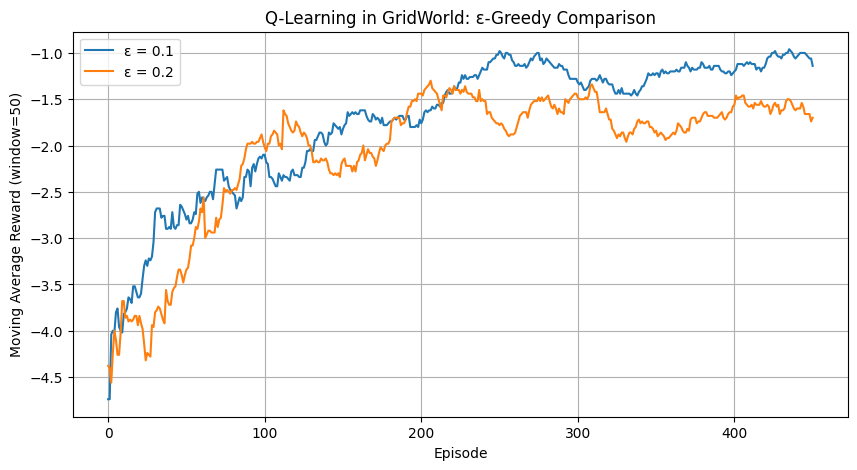

In [8]:
import numpy as np
import matplotlib.pyplot as plt

GRID_SIZE = 4
terminal_states = [(0, 0), (3, 3)]

def get_reward(state):
    if state in terminal_states:
        return 0
    return -1

actions = {
    0: (-1, 0),
    1: (1, 0),
    2: (0, -1),
    3: (0, 1)
}

def next_state(state, action):
    row, col = state
    dr, dc = actions[action]
    new_row = max(0, min(GRID_SIZE - 1, row + dr))
    new_col = max(0, min(GRID_SIZE - 1, col + dc))
    return (new_row, new_col)

def state_to_index(state):
    return state[0] * GRID_SIZE + state[1]

def index_to_state(index):
    return (index // GRID_SIZE, index % GRID_SIZE)

def init_q_table(n_states, n_actions):
    return np.zeros((n_states, n_actions))

def q_update(Q, s, a, r, s_next, alpha, gamma):
    Q[s, a] += alpha * (r + gamma * np.max(Q[s_next]) - Q[s, a])
    return Q

def select_action(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(Q.shape[1])
    return np.argmax(Q[state])

def run_training(epsilon):
    Q = init_q_table(GRID_SIZE * GRID_SIZE, 4)
    rewards = []
    alpha = 0.1
    gamma = 0.99
    episodes = 500

    for ep in range(episodes):
        state = (np.random.randint(GRID_SIZE), np.random.randint(GRID_SIZE))
        while state in terminal_states:
            state = (np.random.randint(GRID_SIZE), np.random.randint(GRID_SIZE))
        total_reward = 0

        for step in range(100):
            s = state_to_index(state)
            a = select_action(Q, s, epsilon)
            next_st = next_state(state, a)
            s_next = state_to_index(next_st)
            r = get_reward(next_st)
            Q = q_update(Q, s, a, r, s_next, alpha, gamma)
            state = next_st
            total_reward += r
            if next_st in terminal_states:
                break
        rewards.append(total_reward)

    return rewards

rewards_eps_01 = run_training(epsilon=0.1)
rewards_eps_02 = run_training(epsilon=0.2)

def moving_average(data, window=50):
    return np.convolve(data, np.ones(window)/window, mode='valid')

plt.figure(figsize=(10, 5))
plt.plot(moving_average(rewards_eps_01), label='ε = 0.1')
plt.plot(moving_average(rewards_eps_02), label='ε = 0.2')
plt.xlabel('Episode')
plt.ylabel('Moving Average Reward (window=50)')
plt.title('Q-Learning in GridWorld: ε-Greedy Comparison')
plt.legend()
plt.grid(True)
plt.show()


# TASK 3 : EXPERIENCE REPLAY BUFFER

In [10]:
import numpy as np
import random

capacity = 10000
buffer = []
position = 0

def push(state, action, reward, next_state, done):
    global buffer, position
    data = (state, action, reward, next_state, done)
    if len(buffer) < capacity:
        buffer.append(data)
    else:
        buffer[position] = data
    position = (position + 1) % capacity

def sample(batch_size):
    batch = random.sample(buffer, batch_size)
    states, actions, rewards, next_states, dones = zip(*batch)

    states = np.array(states)
    actions = np.array(actions)
    rewards = np.array(rewards)
    next_states = np.array(next_states)
    dones = np.array(dones)

    return states, actions, rewards, next_states, dones

def buffer_len():
    return len(buffer)

if __name__ == "__main__":

    for i in range(50):
        state = np.array([i, i + 1])
        action = i % 4
        reward = float(i)
        next_state = np.array([i + 1, i + 2])
        done = (i % 10 == 0)

        push(state, action, reward, next_state, done)

    print(f"Buffer size after pushing: {buffer_len()}")

    batch_size = 10
    states, actions, rewards, next_states, dones = sample(batch_size)

    print("Sampled states:\n", states)
    print("Sampled actions:\n", actions)
    print("Sampled rewards:\n", rewards)
    print("Sampled next_states:\n", next_states)
    print("Sampled dones:\n", dones)


Buffer size after pushing: 50
Sampled states:
 [[14 15]
 [35 36]
 [16 17]
 [ 8  9]
 [47 48]
 [30 31]
 [21 22]
 [33 34]
 [49 50]
 [ 6  7]]
Sampled actions:
 [2 3 0 0 3 2 1 1 1 2]
Sampled rewards:
 [14. 35. 16.  8. 47. 30. 21. 33. 49.  6.]
Sampled next_states:
 [[15 16]
 [36 37]
 [17 18]
 [ 9 10]
 [48 49]
 [31 32]
 [22 23]
 [34 35]
 [50 51]
 [ 7  8]]
Sampled dones:
 [False False False False False  True False False False False]


In [12]:
import numpy as np
import random

class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = []
        self.position = 0

    def push(self, state, action, reward, next_state, done):
        data = (state, action, reward, next_state, done)
        if len(self.buffer) < self.capacity:
            self.buffer.append(data)
        else:
            self.buffer[self.position] = data
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = np.array(states)
        actions = np.array(actions)
        rewards = np.array(rewards)
        next_states = np.array(next_states)
        dones = np.array(dones)

        return states, actions, rewards, next_states, dones

    def __len__(self):
        return len(self.buffer)


if __name__ == "__main__":
    buffer = ReplayBuffer(capacity=100)

    for _ in range(100):
        state = np.random.randint(0, 10, size=(4,))
        action = np.random.randint(0, 5)
        reward = random.random()
        next_state = np.random.randint(0, 10, size=(4,))
        done = random.choice([True, False])

        buffer.push(state, action, reward, next_state, done)

    batch_size = 32
    states, actions, rewards, next_states, dones = buffer.sample(batch_size)

    print("Sampled batch shapes and types:")
    print(f"States shape: {states.shape}, dtype: {states.dtype}")
    print(f"Actions shape: {actions.shape}, dtype: {actions.dtype}")
    print(f"Rewards shape: {rewards.shape}, dtype: {rewards.dtype}")
    print(f"Next_states shape: {next_states.shape}, dtype: {next_states.dtype}")
    print(f"Dones shape: {dones.shape}, dtype: {dones.dtype}")


Sampled batch shapes and types:
States shape: (32, 4), dtype: int64
Actions shape: (32,), dtype: int64
Rewards shape: (32,), dtype: float64
Next_states shape: (32, 4), dtype: int64
Dones shape: (32,), dtype: bool


# TASK 4 : DEEP Q-NETWORK WITH TARGET COPY

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DQNPolicy(nn.Module):
    def __init__(self, obs_dim, num_actions):
        super(DQNPolicy, self).__init__()
        self.fc1 = nn.Linear(obs_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.out = nn.Linear(128, num_actions)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

class DQNTarget(nn.Module):
    def __init__(self, obs_dim, num_actions):
        super(DQNTarget, self).__init__()
        self.fc1 = nn.Linear(obs_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.out = nn.Linear(128, num_actions)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)
obs_dim = 4
num_actions = 2

policy_net = DQNPolicy(obs_dim, num_actions)
target_net = DQNTarget(obs_dim, num_actions)

sample_input = torch.randn(1, obs_dim)
policy_output = policy_net(sample_input)
target_output = target_net(sample_input)

print("Policy output shape:", policy_output.shape)
print("Target output shape:", target_output.shape)


Policy output shape: torch.Size([1, 2])
Target output shape: torch.Size([1, 2])


In [14]:
def update_target(policy_net, target_net):
    target_net.load_state_dict(policy_net.state_dict())
